In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# importing the dataset
df= pd.read_csv("diabetes.csv",names=col_names)
#label encoding
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols]
y = df['label']
# splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
#creating the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
y_pred= model.predict(X_test)


34     0
556    0
409    1
765    0
364    1
      ..
763    0
192    0
629    0
559    0
684    1
Name: label, Length: 538, dtype: int64
[1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]


/home/trishal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
#confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

array([[125,  23],
       [ 45,  38]])

In [32]:
#model evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7056277056277056
Precision: 0.6229508196721312
Recall: 0.4578313253012048


Text(0.5, 15.0, 'Predicted label')

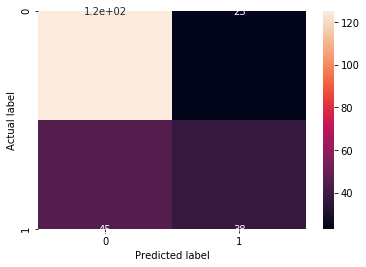

In [39]:
# visualization of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')